### AS & WITH

Our queries can grow up very fast and those can become harder to debug and read.
|  ID   |        Name        | Animal | Years_old |
| :---: | :----------------: | :----: | :-------: |
|   1   | Dr. Harris Bonkers | Rabbit |    4.5    |
|   2   |        Moon        |  Dog   |    9.0    |
|   3   |       Ripley       |  Cat   |    1.5    |
|   4   |        Tom         |  Cat   |    7.8    |

##### AS
- Use AS to rename the columns generated by your queries, which is also known as **aliasing**.

In [1]:
# example
QUERY = """
    SELECT Animal, COUNT(ID) AS Number
    FROM 'bigquery-public-data.pet_records.pets'
    GROUP BY Animal
"""

### WITH ... AS
With generates a common table expression (or CTE) is a temporary table that you return within your query.

In [2]:
# example
QUERY = """
    WITH Seniors AS (
        SELECT Animal, COUNT(ID) AS Number
        FROM 'bigquery-public-data.pet_records.pets'
        GROUP BY Animal
    )
"""

It generates this
|  ID   | Name  |
| :---: | :---: |
|   2   | Moon  |
|   4   |  Tom  |

In [3]:
# And you can query it
QUERY = """
    SELECT ID
    FROM Seniors
"""

Returning
|  ID   |
| :---: |
|   2   |
|   4   |

#### Example with real dataset

In [4]:
from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("secrets.json")
client = bigquery.Client(credentials=credentials)
dataset = client.get_dataset('bigquery-public-data.crypto_bitcoin')
table_ref = dataset.table("transactions")
table = client.get_table(table_ref)
df = client.list_rows(table, max_results=5).to_dataframe()
df

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


Since the **block_timestamp** column contains the date of each transaction in DATETIME format, we'll convert these into DATE format using the DATE() command. Next, we can use that table again.

In [6]:
query_with_CTE = """ 
    WITH time AS 
    (
        SELECT DATE(block_timestamp) AS trans_date
        FROM `bigquery-public-data.crypto_bitcoin.transactions`
    )
    SELECT COUNT(1) AS transactions,
        trans_date
    FROM time
    GROUP BY trans_date
    ORDER BY trans_date
"""
query_job = client.query(query_with_CTE)
transactions_by_date = query_job.to_dataframe()
transactions_by_date

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12
...,...,...
4790,220673,2022-02-19
4791,200535,2022-02-20
4792,237402,2022-02-21
4793,260265,2022-02-22


<AxesSubplot:xlabel='trans_date'>

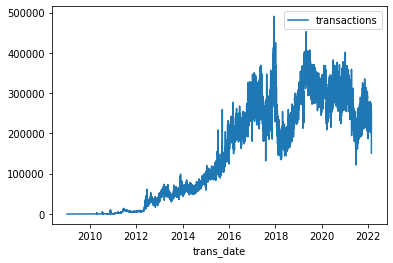

In [8]:
transactions_by_date.set_index('trans_date').plot()